# Case Study 2. Crash Test Dummies: Paired Analysis

The Health and Safety Commission are interested in comparing the head
injury reading for people in the driver's seat to the head injury
reading for people in the passenger seat, when involved in a standard
car accident (taken to be crashing into a wall at 35MPH). In particular,
they are interested in obtaining an estimate of the average difference
between these two readings.

In [1]:
install.packages("s20x")
library(s20x)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

Installing package into '/home/nbuser/R'
(as 'lib' is unspecified)


In [16]:
crash.df = read.table('data/crash.txt', header = TRUE)
#head(crash.df)
#tail(crash.df)
# Extract head injury criterion for driver and passenger.
dHead = with(crash.df, HeadIC[D.P == "Driver"])
#dHead
pHead = with(crash.df, HeadIC[D.P == "Passenger"])
#pHead
# Find difference
#diffHead = dHead - pHead
diffHead = pHead - dHead
diffHead

[1]   -2  183  -85  525  329 -673 -345  396 -305  -73   -2   37  568 -285  -20
 [16]  463  800 -104  907 -938 -126 -538 -102 -835  -46 -884 -156   -9  -44 -133
 [31]   16 -192 -178 -213 -474 -132 -126 -222 -251  -45 -235  111  564 -387 -372
 [46]  -23 -467 -230 -254 -425 -412  287 -277 -252 -259  -23 -252 -767 -370  251
 [61]  388  828 -102  471 -362  -45  586 -389 -307   33 -117 -515 -160   27 -313
 [76] -832 -575  118 -562  -72  -46 -521 -476  -77 -171  209  -45  147 -316 -245
 [91]   78 -199 -783 -144  100 -455  -64 -332  418  703 -173  102 -149 -196 -448
[106] -246 -607 -409  339   31 -578  -74

In [12]:
summaryStats(diffHead)

Minimum value:           -907 
Maximum value:           938 
Mean value:              121.72 
Median:                  138.5 
Upper quartile:          335.25 
Lower quartile:          -28 
Variance:                132818.2 
Standard deviation:      364.44 
Midspread (IQR):         363.25 
Skewness:                -0.45 
Number of data values:   112 


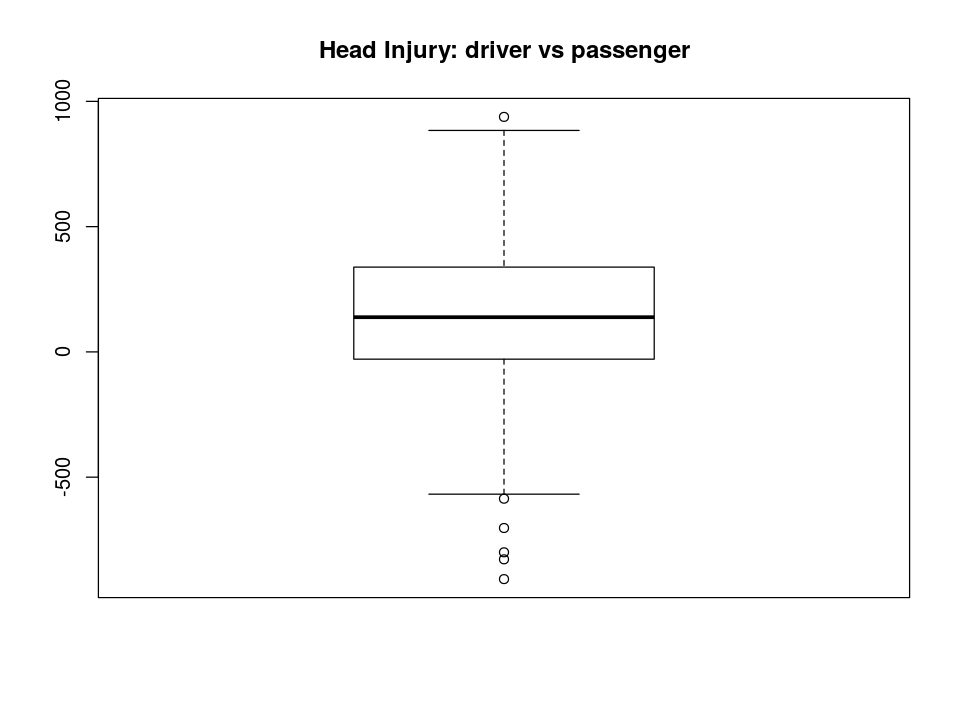

In [13]:
boxplot(diffHead, main = "Head Injury: driver vs passenger")

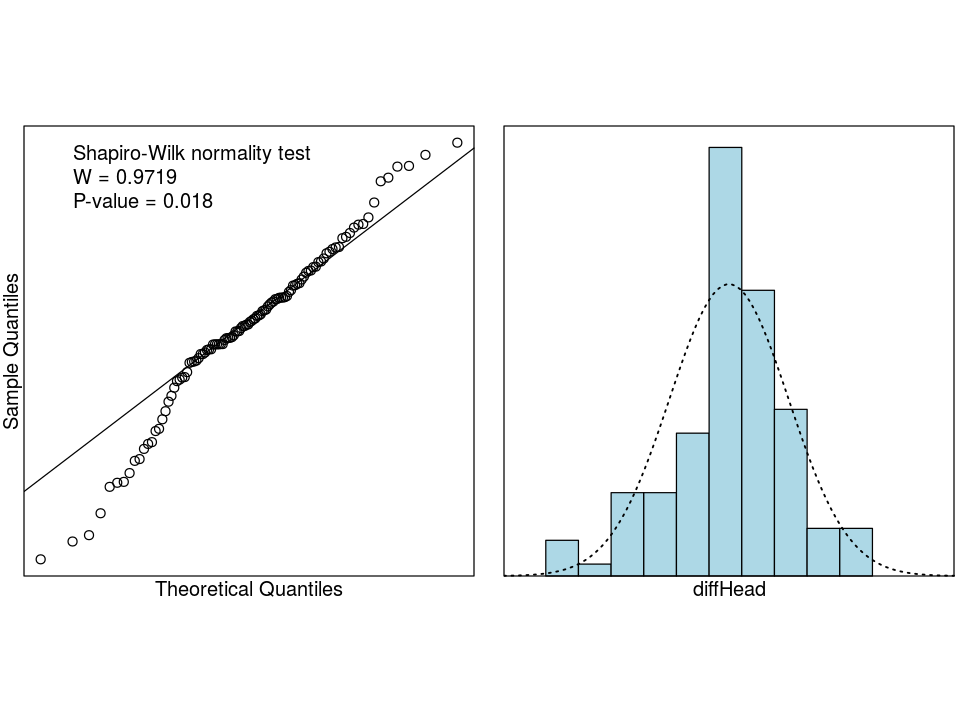

In [14]:
normcheck(diffHead, shapiro.wilk = TRUE)

In [17]:
t.test(diffHead)


	One Sample t-test

data:  diffHead
t = -3.5347, df = 111, p-value = 0.0005965
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -189.96156  -53.48487
sample estimates:
mean of x 
-121.7232 


## Methods and Assumption Checks

We wish to estimate the difference between two measurements (driver's
injury and passenger's injury scores) when the dummies are in the same
car, so we carry out a paired-sample analysis.

The crash tests for each car should be independent of one another. The
Q-Q plot shows that the data is slightly left-skewed, however we can
rely on the Central Limit Theorem to justify the Normality assumption.

The model fitted is
${\tt diffHead}_i = \mu_{\text{diff}} + \varepsilon_i$, where
$\mu_{\text{diff}}$ is the mean difference in head injury readings for
each car, and $\varepsilon_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$.

## Executive Summary

We are interested in determining whether there is a difference between
the average head injury reading for a person in the driver's seat and
the average head injury reading for a person in the front passenger's
seat, when involved in a car crash.

Since our data involved two related measurements (on the driver and
front passenger of each car crashed) the difference between the two head
injury readings has been analysed.

We observe that the head injury reading for someone in the driver's seat
is higher than for someone in the passenger's seat.

We estimate that the mean difference between the head injury reading for
someone in the driver's seat and someone in the passenger's seat is
between 53.48 and 189.96 points.